In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # fixed
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')



plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)  # fixed


In [2]:
df = pd.read_csv('./cleaned_data.csv')

In [3]:
df.shape

(2540047, 49)

In [4]:
df.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,sjit,djit,stime,ltime,sintpkt,dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,29,0,0,dns,500473.93750,621800.93750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,29,0,0,-,87676.08594,50480.17188,4,4,0,0,0,0,132,76,0,0,9.89101,10.682733,1421927414,1421927414,7.005,7.564333,0.0,0.0,0.0,0,0,0.0,0.0,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,29,0,0,dns,521894.53130,636282.37500,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,29,0,0,dns,436724.56250,542597.18750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.043,0.014000,0.0,0.0,0.0,0,0,0.0,0.0,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,29,0,0,dns,499572.25000,609067.56250,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.005,0.003000,0.0,0.0,0.0,0,0,0.0,0.0,0,7,9,1,1,1,1,1,NaN,0


In [5]:
df.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload',
       'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime',
       'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'label'],
      dtype='object')

In [6]:
df.dtypes

srcip                object
sport                object
dstip                object
dsport               object
proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
sload               float64
dload               float64
spkts                 int64
dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
sjit                float64
djit                float64
stime                 int64
ltime                 int64
sintpkt             float64
dintpkt             float64
tcprtt              float64
synack              float64
ackdat              float64
is_sm_ips_ports     

In [7]:
#df.describe()
df.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,sjit,djit,stime,ltime,sintpkt,dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,29,0,0,dns,500473.93750,621800.93750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,29,0,0,-,87676.08594,50480.17188,4,4,0,0,0,0,132,76,0,0,9.89101,10.682733,1421927414,1421927414,7.005,7.564333,0.0,0.0,0.0,0,0,0.0,0.0,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,29,0,0,dns,521894.53130,636282.37500,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,29,0,0,dns,436724.56250,542597.18750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.043,0.014000,0.0,0.0,0.0,0,0,0.0,0.0,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,29,0,0,dns,499572.25000,609067.56250,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.005,0.003000,0.0,0.0,0.0,0,0,0.0,0.0,0,7,9,1,1,1,1,1,NaN,0


In [8]:
# Removing the Columns that we don't need
# Removed all columns with IP's, and Ports. Since these are just identifiers that do not participate in the classification process. 
# Removed Start times (stime) and Last recorded time (Ltime) and we created a durations column instead (dur). Which is more relevant to what we're doing
# Now remaining 43 columns out of the original 49 columns. 

df = df.drop(['srcip', 'dstip', 'sport', 'dsport', 'stime', 'ltime'], axis=1).copy()

In [9]:
df.shape

(2540047, 43)

In [10]:
df.dtypes

proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
sload               float64
dload               float64
spkts                 int64
dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
sjit                float64
djit                float64
sintpkt             float64
dintpkt             float64
tcprtt              float64
synack              float64
ackdat              float64
is_sm_ips_ports       int64
ct_state_ttl          int64
ct_flw_http_mthd    float64
is_ftp_login        float64
ct_ftp_cmd           object
ct_srv_src            int64
ct_srv_dst          

In [11]:
df.columns

Index(['proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
       'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin',
       'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len',
       'sjit', 'djit', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'label'],
      dtype='object')

In [12]:
# Renaming some of the columns so that it makes a bit more sense, a catalog of features will be submitted with this project explaining what each attribute is.

df = df.rename(columns={'smeansz':'smean',
                   'dmeansz':'dmean',
                   'sintpkt':'Src_pkt_AT',
                   'dintpkt':'Dst_pkt_AT'})

In [13]:
df.columns

Index(['proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
       'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin',
       'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'res_bdy_len',
       'sjit', 'djit', 'Src_pkt_AT', 'Dst_pkt_AT', 'tcprtt', 'synack',
       'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm',
       'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'attack_cat', 'label'],
      dtype='object')

In [14]:
# Now, we're going to check for Null values

df.isna().sum()

proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
sload                     0
dload                     0
spkts                     0
dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smean                     0
dmean                     0
trans_depth               0
res_bdy_len               0
sjit                      0
djit                      0
Src_pkt_AT                0
Dst_pkt_AT                0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports           0
ct_state_ttl              0
ct_flw_http_mthd    1348145
is_ftp_login        1429879
ct_ftp_cmd                0
ct_srv_src                0
ct_srv_dst          

In [15]:
# Checking for duplicates, and removing them 
df.loc[df.duplicated()]

# Now we re-assign our data frame to the rows without duplicats, this way we eliminate duplicates all together
df = df.loc[~df.duplicated()].reset_index(drop=True).copy()

In [16]:
# seems that after removing the identical duplicates, we're now left with 2mil rows, which means 500k rows were dropped from our data frame
df.shape

(2027332, 43)

In [17]:
# Re-examining the data after the duplciated have been deleted
df.head()

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,res_bdy_len,sjit,djit,Src_pkt_AT,Dst_pkt_AT,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,udp,CON,0.001055,132,164,31,29,0,0,dns,500473.93750,621800.93750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,0.017,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0,3,7,1,3,1,1,1,NaN,0
1,udp,CON,0.036133,528,304,31,29,0,0,-,87676.08594,50480.17188,4,4,0,0,0,0,132,76,0,0,9.89101,10.682733,7.005,7.564333,0.0,0.0,0.0,0,0,0.0,0.0,0,2,4,2,3,1,1,2,NaN,0
2,udp,CON,0.001119,146,178,31,29,0,0,dns,521894.53130,636282.37500,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,0.017,0.013000,0.0,0.0,0.0,0,0,0.0,0.0,0,12,8,1,2,2,1,1,NaN,0
3,udp,CON,0.001209,132,164,31,29,0,0,dns,436724.56250,542597.18750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,0.043,0.014000,0.0,0.0,0.0,0,0,0.0,0.0,0,6,9,1,1,1,1,1,NaN,0
4,udp,CON,0.001169,146,178,31,29,0,0,dns,499572.25000,609067.56250,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,0.005,0.003000,0.0,0.0,0.0,0,0,0.0,0.0,0,7,9,1,1,1,1,1,NaN,0


In [18]:
# Now we check for conflicts and make sure we don't have any 

conflicts = df.groupby(df.columns.difference(['label']).tolist())['label'].nunique()
conflicts = conflicts[conflicts > 1]
print(f"Conflicting entries found: {len(conflicts)}")

Conflicting entries found: 0


In [19]:
df.isna().sum()

proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
sload                     0
dload                     0
spkts                     0
dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smean                     0
dmean                     0
trans_depth               0
res_bdy_len               0
sjit                      0
djit                      0
Src_pkt_AT                0
Dst_pkt_AT                0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports           0
ct_state_ttl              0
ct_flw_http_mthd     908687
is_ftp_login         989249
ct_ftp_cmd                0
ct_srv_src                0
ct_srv_dst          

In [20]:
# Now that we've done the general data cleaning, it is time to understand each feature

##########################################################
# This process is called Univariate Analysis
##########################################################

# I noticed that for the Attach Category column (attack_cat), most of the values where the label = 0 are null, which means that there is nothing abnormal or out of the ordinary


####################################################################################

# 'attack_cat'
# Therefore, I am gonna replace all the Null values in the 'attack_cat' column with the 'Normal' Values
df['attack_cat'] = df['attack_cat'].fillna('Normal')

# Now we are examinig the 'ct_flw_http_mthd' which seems to have 908687 null values, since this column has values of 0's and 1's
# So first we'll switch the data type from a float64 to an Integer, then fill in the null values with 0's


####################################################################################

# 'ct_flw_http_mthd'
# Step 1: Fill NaNs with 0
df['ct_flw_http_mthd'] = df['ct_flw_http_mthd'].fillna(0)

# Step 2: Convert to int
df['ct_flw_http_mthd'] = df['ct_flw_http_mthd'].astype(int)

# Now We do the same thing again, but this time it will be on 'is_ftp_login' column

####################################################################################

# 'ct_ftp_cmd'
# Step 1: Covert the values to numbers
df['ct_ftp_cmd'] = pd.to_numeric(df['ct_ftp_cmd'], errors='coerce')


# Step 2: Fill the NaNs with 0's (Assuiming no FTP activity)
df['ct_ftp_cmd'] = df['ct_ftp_cmd'].fillna(0).astype(int)


####################################################################################

# 'is_ftp_login'
# Step 1: Fill NaNs with 0
df['is_ftp_login'] = df['is_ftp_login'].fillna(0)

# Step 2: Convert to int
df['is_ftp_login'] = df['is_ftp_login'].astype(int)


In [21]:
# Double Checking that all Null values have been removed
df.isna().sum()

proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
sload               0
dload               0
spkts               0
dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smean               0
dmean               0
trans_depth         0
res_bdy_len         0
sjit                0
djit                0
Src_pkt_AT          0
Dst_pkt_AT          0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_flw_http_mthd    0
is_ftp_login        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ltm          0
ct_src_dport_ltm    0
ct_dst_sport_ltm    0
ct_dst_src_ltm      0
attack_cat          0
label               0
dtype: int64

In [22]:
##########################################################
# Noise Reduction
##########################################################



# Now we check for conflicts and make sure we don't have any 
conflicts = df.groupby(df.columns.difference(['label']).tolist())['label'].nunique()
conflicts = conflicts[conflicts > 1]
print(f"Conflicting entries found: {len(conflicts)}")


Conflicting entries found: 0


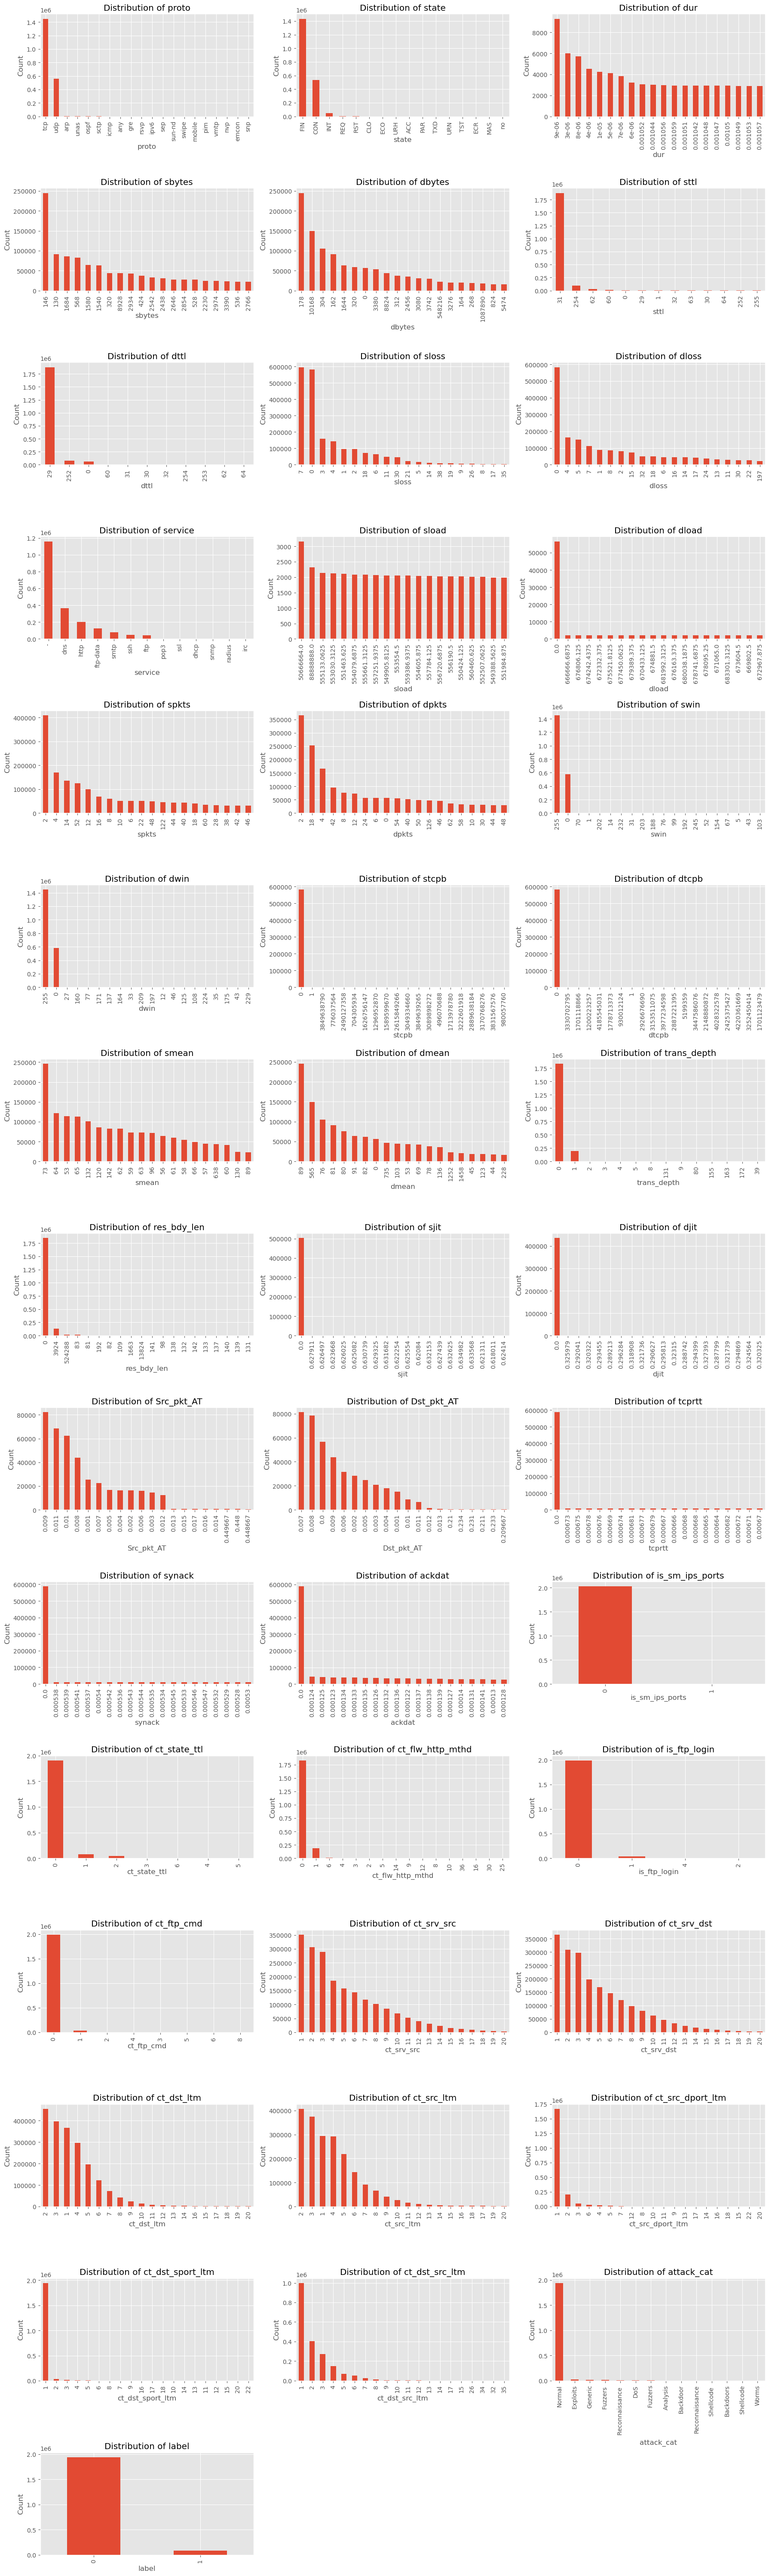

In [23]:
# Now we can start exploring each feature/attribute to have a clearer undertanding of its distribution

import matplotlib.pyplot as plt

# Get all columns except the target labels if needed
all_cols = df.columns.tolist()

# Optional: exclude label columns (uncomment if desired)
# all_cols = [col for col in all_cols if col not in ['label', 'attack_cat']]

# Grid layout
n_cols = 3
n_rows = (len(all_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))

for i, col in enumerate(all_cols):
    row = i // n_cols
    col_pos = i % n_cols
    ax = axes[row, col_pos] if n_rows > 1 else axes[col_pos]
    
    try:
        value_counts = df[col].value_counts(dropna=False).head(20)
        value_counts.plot(kind='bar', ax=ax)
        ax.set_title(f'Distribution of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
    except Exception as e:
        ax.set_visible(False)
        print(f"Skipped column {col} due to: {e}")

# Remove any extra empty subplots
for j in range(i + 1, n_rows * n_cols):
    row = j // n_cols
    col_pos = j % n_cols
    fig.delaxes(axes[row, col_pos] if n_rows > 1 else axes[col_pos])

plt.tight_layout()
plt.show()


In [24]:
df.dtypes

proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
sload               float64
dload               float64
spkts                 int64
dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smean                 int64
dmean                 int64
trans_depth           int64
res_bdy_len           int64
sjit                float64
djit                float64
Src_pkt_AT          float64
Dst_pkt_AT          float64
tcprtt              float64
synack              float64
ackdat              float64
is_sm_ips_ports       int64
ct_state_ttl          int64
ct_flw_http_mthd      int64
is_ftp_login          int64
ct_ftp_cmd            int64
ct_srv_src            int64
ct_srv_dst          

In [25]:
# Checking for the attack_cat distribution and removing duplicates

df.attack_cat.value_counts()

attack_cat
Normal              1938908
Exploits              27436
Generic               18860
 Fuzzers              17054
 Reconnaissance        8723
DoS                    5502
 Fuzzers               3911
Analysis               2033
Backdoor               1584
Reconnaissance         1395
 Shellcode             1235
Backdoors               297
Shellcode               223
Worms                   171
Name: count, dtype: int64

In [26]:
df.head()

,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,res_bdy_len,sjit,djit,Src_pkt_AT,Dst_pkt_AT,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,udp,CON,0.001055,132,164,31,29,0,0,dns,500473.93750,621800.93750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,0.017,0.013000,0.0,0.0,0.0,0,0,0,0,0,3,7,1,3,1,1,1,Normal,0
1,udp,CON,0.036133,528,304,31,29,0,0,-,87676.08594,50480.17188,4,4,0,0,0,0,132,76,0,0,9.89101,10.682733,7.005,7.564333,0.0,0.0,0.0,0,0,0,0,0,2,4,2,3,1,1,2,Normal,0
2,udp,CON,0.001119,146,178,31,29,0,0,dns,521894.53130,636282.37500,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,0.017,0.013000,0.0,0.0,0.0,0,0,0,0,0,12,8,1,2,2,1,1,Normal,0
3,udp,CON,0.001209,132,164,31,29,0,0,dns,436724.56250,542597.18750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,0.043,0.014000,0.0,0.0,0.0,0,0,0,0,0,6,9,1,1,1,1,1,Normal,0
4,udp,CON,0.001169,146,178,31,29,0,0,dns,499572.25000,609067.56250,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,0.005,0.003000,0.0,0.0,0.0,0,0,0,0,0,7,9,1,1,1,1,1,Normal,0


In [27]:
df.dtypes

proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
sload               float64
dload               float64
spkts                 int64
dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smean                 int64
dmean                 int64
trans_depth           int64
res_bdy_len           int64
sjit                float64
djit                float64
Src_pkt_AT          float64
Dst_pkt_AT          float64
tcprtt              float64
synack              float64
ackdat              float64
is_sm_ips_ports       int64
ct_state_ttl          int64
ct_flw_http_mthd      int64
is_ftp_login          int64
ct_ftp_cmd            int64
ct_srv_src            int64
ct_srv_dst          

In [28]:
df.attack_cat.value_counts()

attack_cat
Normal              1938908
Exploits              27436
Generic               18860
 Fuzzers              17054
 Reconnaissance        8723
DoS                    5502
 Fuzzers               3911
Analysis               2033
Backdoor               1584
Reconnaissance         1395
 Shellcode             1235
Backdoors               297
Shellcode               223
Worms                   171
Name: count, dtype: int64

In [29]:
df.columns

Index(['proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
       'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin',
       'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'res_bdy_len',
       'sjit', 'djit', 'Src_pkt_AT', 'Dst_pkt_AT', 'tcprtt', 'synack',
       'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm',
       'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'attack_cat', 'label'],
      dtype='object')

In [30]:
columns_to_check = [
    'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
    'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin',
    'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'res_bdy_len',
    'sjit', 'djit', 'Src_pkt_AT', 'Dst_pkt_AT', 'tcprtt', 'synack',
    'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd',
    'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm',
    'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
    'attack_cat', 'label'
]

for col in columns_to_check:
    print(f"\n--- Value counts for '{col}' ---")
    try:
        print(df[col].value_counts(dropna=False))
    except Exception as e:
        print(f"Could not display value counts for column '{col}': {e}")



--- Value counts for 'proto' ---
proto
tcp     1448317
udp      560399
arp        4494
unas       3774
ospf       3484
         ...   
tlsp         40
ggp          39
udt           8
rtp           7
esp           2
Name: count, Length: 135, dtype: int64

--- Value counts for 'state' ---
state
FIN    1433508
CON     536960
INT      50866
REQ       5036
RST        525
CLO        160
ECO        124
URH         54
ACC         41
PAR         22
TXD          7
URN          7
TST          7
ECR          7
MAS          6
no           2
Name: count, dtype: int64

--- Value counts for 'dur' ---
dur
0.000009    9296
0.000003    6022
0.000008    5715
0.000004    4531
0.000010    4263
            ... 
1.424426       1
0.176378       1
0.115063       1
0.633496       1
0.916740       1
Name: count, Length: 587303, dtype: int64

--- Value counts for 'sbytes' ---
sbytes
146      244851
130       90861
1684      85756
568       82311
1580      64010
          ...  
36660         1
15148         1
3719

In [31]:

columns_to_check = [
    'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
    'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin',
    'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'res_bdy_len',
    'sjit', 'djit', 'Src_pkt_AT', 'Dst_pkt_AT', 'tcprtt', 'synack',
    'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd',
    'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm',
    'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
    'attack_cat', 'label'
]

# Build a matrix-style summary
summary_data = []

for col in columns_to_check:
    try:
        top_values = df[col].value_counts(dropna=False).head(5)
        formatted = ', '.join([f"{str(k)} ({v})" for k, v in top_values.items()])
        summary_data.append({'Column': col, 'Top 5 Values': formatted})
    except Exception as e:
        summary_data.append({'Column': col, 'Top 5 Values': f"Error: {e}"})

# Create a DataFrame
summary_df = pd.DataFrame(summary_data)

# Display
pd.set_option('display.max_colwidth', None)
display(summary_df)


,Column,Top 5 Values
0,proto,"tcp (1448317), udp (560399), arp (4494), unas (3774), ospf (3484)"
1,state,"FIN (1433508), CON (536960), INT (50866), REQ (5036), RST (525)"
2,dur,"9e-06 (9296), 3e-06 (6022), 8e-06 (5715), 4e-06 (4531), 1e-05 (4263)"
3,sbytes,"146 (244851), 130 (90861), 1684 (85756), 568 (82311), 1580 (64010)"
4,dbytes,"178 (244689), 10168 (149285), 304 (105068), 162 (90768), 1644 (62961)"
5,sttl,"31 (1880127), 254 (97948), 62 (26798), 60 (10492), 0 (4606)"
6,dttl,"29 (1879403), 252 (79831), 0 (60071), 60 (3753), 31 (2300)"
7,sloss,"7 (596159), 0 (581067), 3 (158642), 4 (142449), 1 (95379)"
8,dloss,"0 (583169), 4 (163537), 5 (151230), 7 (112602), 1 (89069)"
9,service,"- (1159410), dns (364468), http (203531), ftp-data (124849), smtp (81132)"


In [32]:
##########################################################
# Standarization
##########################################################


# Step 1: Identify object or categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Step 2: Print unique values (sorted and normalized) to detect inconsistencies
for col in cat_cols:
    print(f"\n--- Unique values in '{col}' (raw + normalized) ---")
    
    # Raw unique values
    raw_vals = df[col].unique()
    print(f"Raw values ({len(raw_vals)}):", raw_vals[:15])  # show first 15 for preview
    
    # Normalized values (lowercase + stripped + no special chars)
    normalized_vals = set(
        val.strip().lower().replace("_", "").replace("-", "") 
        for val in df[col].astype(str).unique()
    )
    print(f"Normalized variations ({len(normalized_vals)}):", list(normalized_vals)[:15])



--- Unique values in 'proto' (raw + normalized) ---
Raw values (135): ['udp' 'arp' 'tcp' 'ospf' 'icmp' 'igmp' 'sctp' 'udt' 'sep' 'sun-nd'
 'swipe' 'mobile' 'pim' 'rtp' 'ipnip']
Normalized variations (135): ['emcon', 'swipe', 'rtp', 'pnni', 'ipv6route', 'udp', 'ipnip', 'dgp', 'hmp', 'ipxnip', 'il', 'isotp4', 'esp', 'wbmon', 'ospf']

--- Unique values in 'state' (raw + normalized) ---
Raw values (16): ['CON' 'INT' 'FIN' 'URH' 'REQ' 'ECO' 'RST' 'CLO' 'TXD' 'URN' 'no' 'ACC'
 'PAR' 'MAS' 'TST']
Normalized variations (16): ['rst', 'tst', 'no', 'req', 'eco', 'urn', 'acc', 'par', 'clo', 'txd', 'con', 'urh', 'mas', 'ecr', 'int']

--- Unique values in 'service' (raw + normalized) ---
Raw values (13): ['dns' '-' 'http' 'smtp' 'ftp-data' 'ftp' 'ssh' 'pop3' 'snmp' 'ssl' 'irc'
 'radius' 'dhcp']
Normalized variations (13): ['', 'radius', 'ftpdata', 'irc', 'ftp', 'snmp', 'dns', 'pop3', 'smtp', 'ssl', 'ssh', 'dhcp', 'http']

--- Unique values in 'attack_cat' (raw + normalized) ---
Raw values (14): ['N

In [33]:
df.attack_cat.value_counts()

attack_cat
Normal              1938908
Exploits              27436
Generic               18860
 Fuzzers              17054
 Reconnaissance        8723
DoS                    5502
 Fuzzers               3911
Analysis               2033
Backdoor               1584
Reconnaissance         1395
 Shellcode             1235
Backdoors               297
Shellcode               223
Worms                   171
Name: count, dtype: int64

In [34]:
# ============================
# Cleaning the 'proto' column
# ============================

# Convert all values in 'proto' to lowercase, strip whitespace, and remove special characters (like '-' and '_')
# This ensures consistent labels like 'TCP', ' tcp', 'tcp-' all become 'tcp'
df['proto'] = df['proto'].astype(str) \
                         .str.strip() \
                         .str.lower() \
                         .str.replace(r'[^a-z0-9]', '', regex=True)


# ============================
# Cleaning the 'state' column
# ============================

# Convert all values in 'state' to uppercase and strip whitespace
# 'fin', 'FIN ', ' Fin' all become 'FIN'
df['state'] = df['state'].astype(str) \
                         .str.strip() \
                         .str.upper()


# ============================
# Cleaning the 'service' column
# ============================

# Convert all values in 'service' to lowercase and strip whitespace
# This unifies things like ' HTTP ', 'Http', 'http' → 'http'
df['service'] = df['service'].astype(str) \
                             .str.strip() \
                             .str.lower()

# Replace ambiguous or inconsistent service names with cleaner labels
# '-' → 'none' to explicitly mark missing service info
# 'ftp-data' → 'ftp' to consolidate FTP-related traffic
df['service'] = df['service'].replace({
    '-': 'none',
    'ftp-data': 'ftp'
})


# ============================
# Cleaning the 'attack_cat' column
# ============================

# Convert all values in 'attack_cat' to lowercase and strip whitespace
# Handles things like 'Exploit ', ' exploits' → 'exploits'
df['attack_cat'] = df['attack_cat'].astype(str) \
                                   .str.strip() \
                                   .str.lower()

# Optional: consolidate variations if they exist (like plural forms or typos)
df['attack_cat'] = df['attack_cat'].replace({
    'backdoors': 'backdoor',
    'shell code': 'shellcode',
    'recon': 'reconnaissance'
})


In [35]:
df.attack_cat.value_counts()

attack_cat
normal            1938908
exploits            27436
fuzzers             20965
generic             18860
reconnaissance      10118
dos                  5502
analysis             2033
backdoor             1881
shellcode            1458
worms                 171
Name: count, dtype: int64

In [36]:
# ##########################################################
# Outlier Detection Function (IQR method)
# ##########################################################

def count_outliers_iqr(df_to_check, exclude_cols=['label', 'attack_cat']):
    import numpy as np
    
    numeric_cols = df_to_check.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

    print(f"\n🔎 Checking: {len(numeric_cols)} numeric columns in '{df_to_check.shape[0]:,}' rows\n")
    for col in numeric_cols:
        Q1 = df_to_check[col].quantile(0.25)
        Q3 = df_to_check[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df_to_check[(df_to_check[col] < lower_bound) | (df_to_check[col] > upper_bound)]
        percent = 100 * len(outliers) / len(df_to_check)
        print(f"{col}: {len(outliers)} outliers ({percent:.2f}%)")



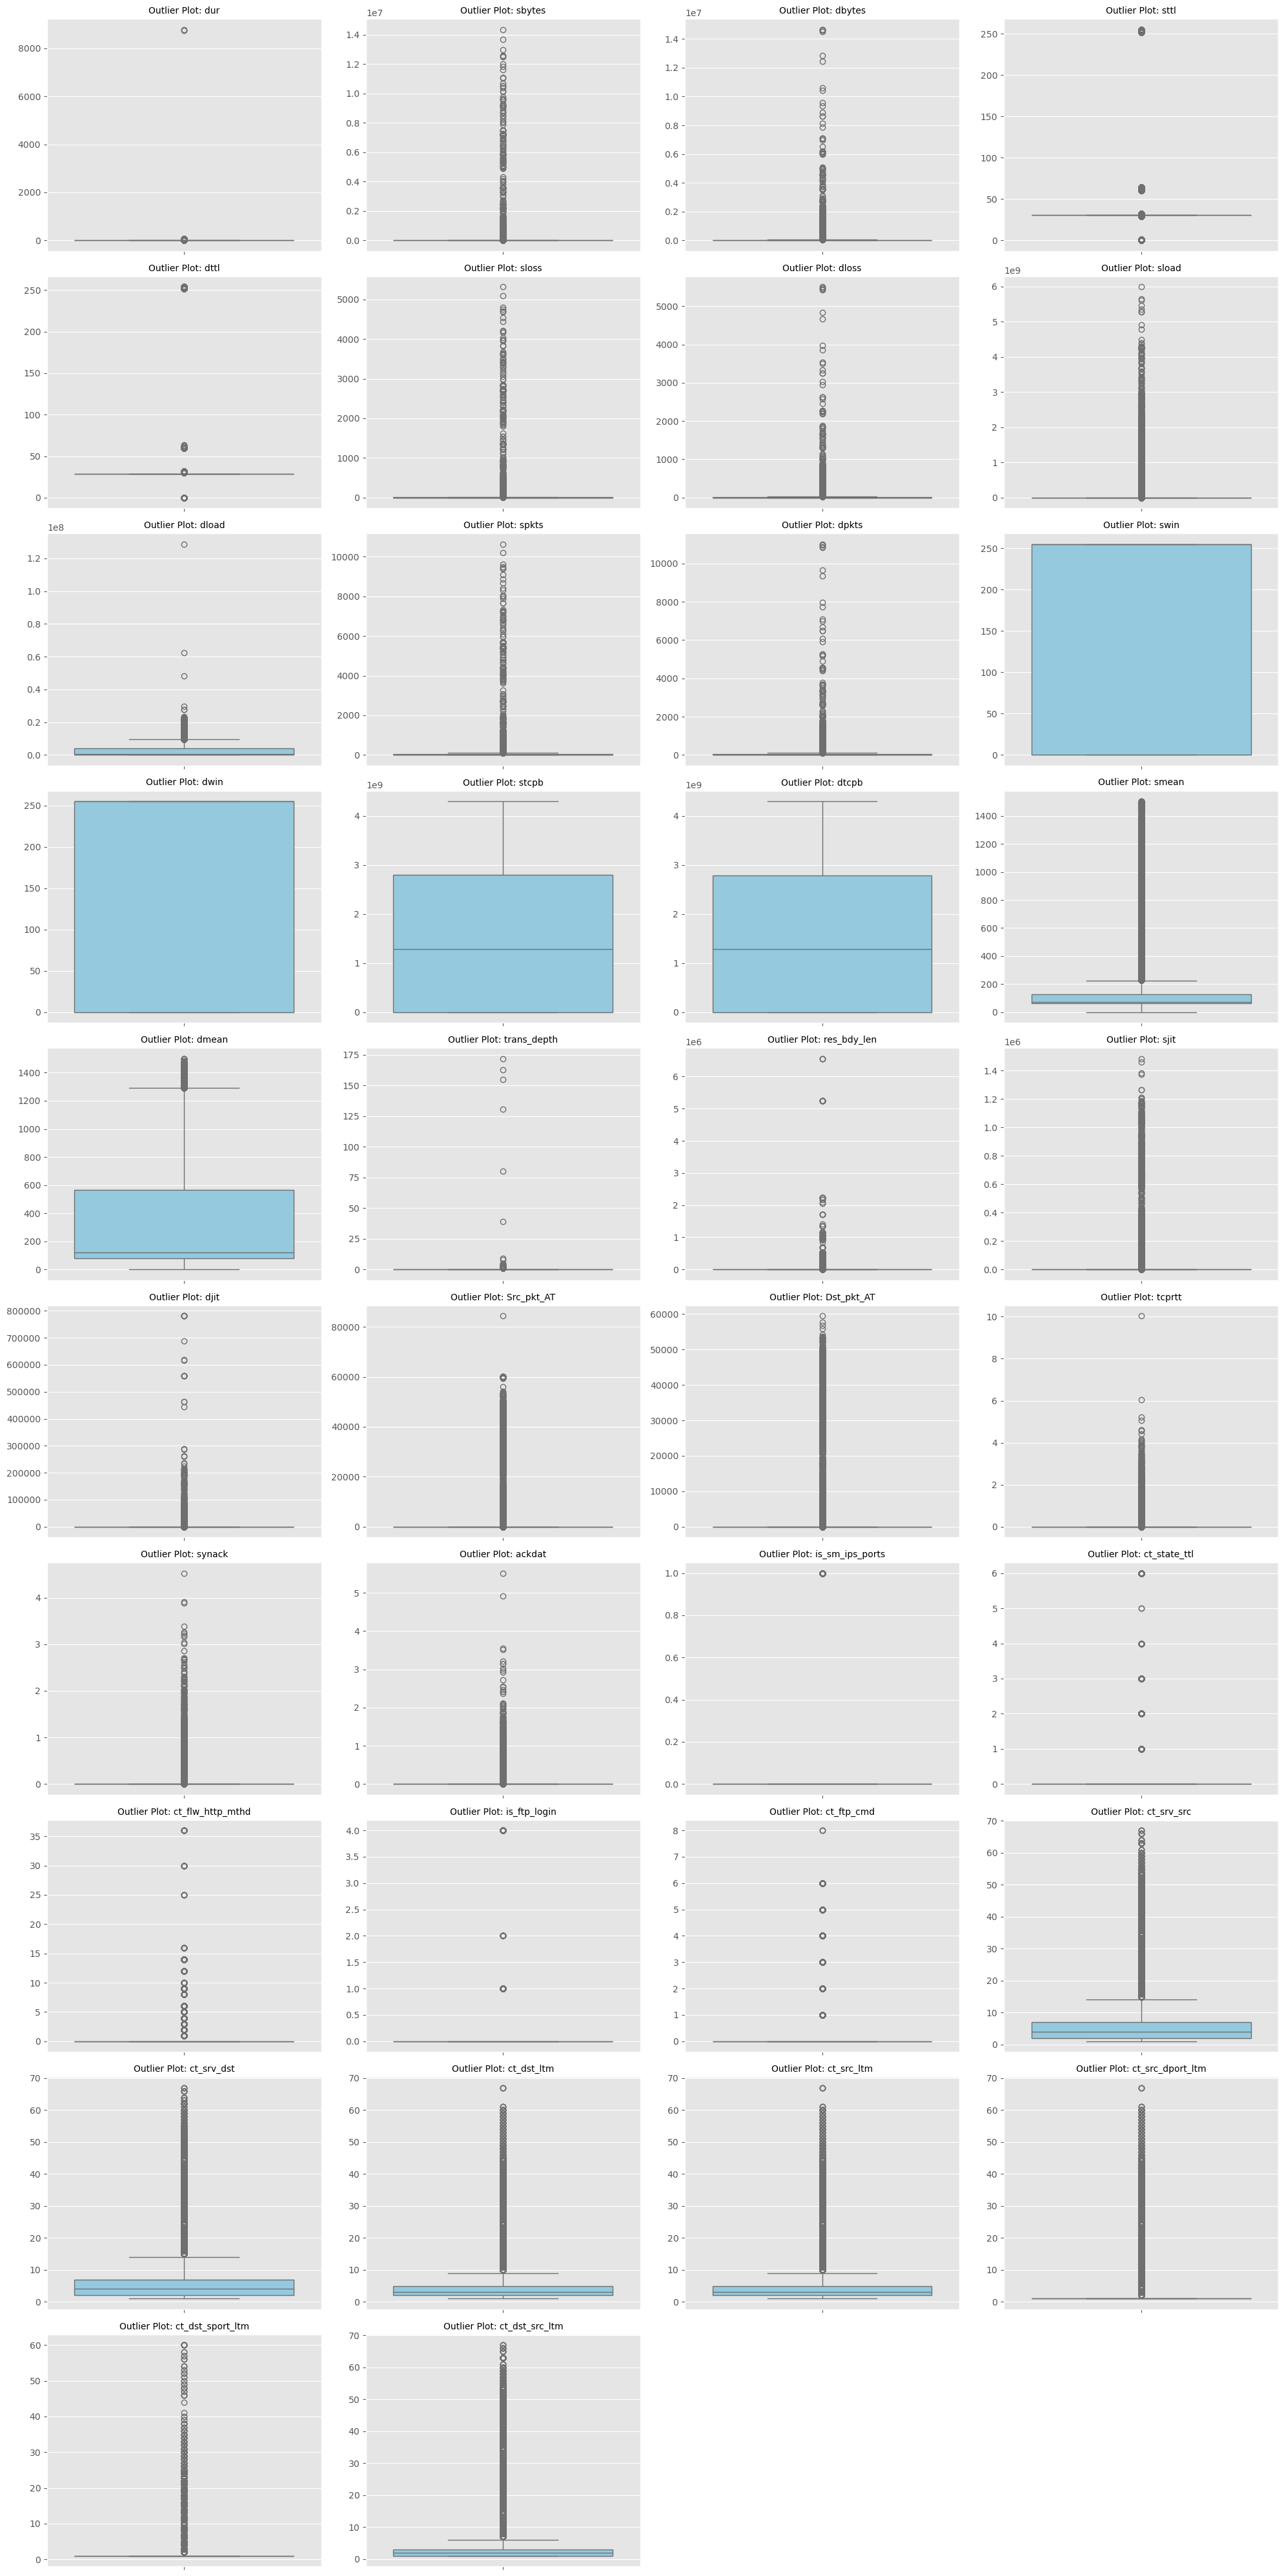

In [37]:
# ##########################################################
# # Plotting Outliers
# ##########################################################

# 1. Select only numeric columns (excluding labels if needed)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['label', 'attack_cat']]

# 2. Plot settings
n_cols = 4  # Change this to 3 if you want 3 per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))

# 3. Plot each column
for i, col in enumerate(numeric_cols):
    row = i // n_cols
    col_pos = i % n_cols
    ax = axes[row, col_pos] if n_rows > 1 else axes[col_pos]
    
    sns.boxplot(y=df[col], ax=ax, color='skyblue')
    ax.set_title(f'Outlier Plot: {col}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')

# 4. Remove unused subplots
for j in range(i + 1, n_rows * n_cols):
    row = j // n_cols
    col_pos = j % n_cols
    fig.delaxes(axes[row, col_pos] if n_rows > 1 else axes[col_pos])

plt.tight_layout()
plt.show()

In [38]:
# ##########################################################
# # Counting the number of rows we drop if we decide to use Outliers
# ##########################################################

# Step 1: Get numeric columns (excluding target labels)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['label', 'attack_cat']]

# Step 2: Initialize mask with all True
non_outlier_mask = np.ones(len(df), dtype=bool)

# Step 3: Build a combined mask to keep only rows within IQR range for all numeric features
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Update mask: True if inside IQR, False if outside
    non_outlier_mask &= (df[col] >= lower) & (df[col] <= upper)

# Step 4: Count how many rows would be dropped
total_rows = len(df)
remaining_rows = non_outlier_mask.sum()
dropped_rows = total_rows - remaining_rows
percent = 100 * dropped_rows / total_rows

# Step 5: Display result
print(f"Total rows: {total_rows}")
print(f"Rows kept: {remaining_rows}")
print(f"Rows dropped: {dropped_rows} ({percent:.2f}%)")

Total rows: 2027332
Rows kept: 637643
Rows dropped: 1389689 (68.55%)


In [39]:
# ================================
# Option 1: Keep outliers as-is ('df_original')
# ================================

# This keeps the original DataFrame with no changes to outliers.
# Use this with tree-based models like XGBoost and Random Forest.
df_original = df.copy()


df_original.shape
print("🔍 Outliers in df_original:")
count_outliers_iqr(df_original)

🔍 Outliers in df_original:

🔎 Checking: 38 numeric columns in '2,027,332' rows

dur: 340744 outliers (16.81%)
sbytes: 227302 outliers (11.21%)
dbytes: 204606 outliers (10.09%)
sttl: 147205 outliers (7.26%)
dttl: 147929 outliers (7.30%)
sloss: 195376 outliers (9.64%)
dloss: 104730 outliers (5.17%)
sload: 173195 outliers (8.54%)
dload: 265716 outliers (13.11%)
spkts: 128740 outliers (6.35%)
dpkts: 139328 outliers (6.87%)
swin: 0 outliers (0.00%)
dwin: 0 outliers (0.00%)
stcpb: 0 outliers (0.00%)
dtcpb: 0 outliers (0.00%)
smean: 169603 outliers (8.37%)
dmean: 23680 outliers (1.17%)
trans_depth: 199017 outliers (9.82%)
res_bdy_len: 181054 outliers (8.93%)
sjit: 350291 outliers (17.28%)
djit: 362145 outliers (17.86%)
Src_pkt_AT: 339981 outliers (16.77%)
Dst_pkt_AT: 337521 outliers (16.65%)
tcprtt: 105336 outliers (5.20%)
synack: 104440 outliers (5.15%)
ackdat: 117299 outliers (5.79%)
is_sm_ips_ports: 742 outliers (0.04%)
ct_state_ttl: 122155 outliers (6.03%)
ct_flw_http_mthd: 199009 outlier

In [40]:
df_original.shape

(2027332, 43)

In [41]:
# ================================
# Option 2: Log-transform + clip ('df_log_clipped')
# ================================

# Choose columns that had high outlier percentages
columns_to_fix = ['dur', 'sjit', 'djit', 'Src_pkt_AT', 'Dst_pkt_AT', 'ct_src_dport_ltm']

df_log_clipped = df.copy()

for col in columns_to_fix:
    # Log transform to reduce skew (preserves 0s)
    df_log_clipped[col] = np.log1p(df_log_clipped[col])

    # Then clip to IQR bounds to flatten extreme outliers
    Q1 = df_log_clipped[col].quantile(0.25)
    Q3 = df_log_clipped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_log_clipped[col] = df_log_clipped[col].clip(lower, upper)

print("\n🔍 Outliers in df_log_clipped:")
count_outliers_iqr(df_log_clipped)



🔍 Outliers in df_log_clipped:

🔎 Checking: 38 numeric columns in '2,027,332' rows

dur: 0 outliers (0.00%)
sbytes: 227302 outliers (11.21%)
dbytes: 204606 outliers (10.09%)
sttl: 147205 outliers (7.26%)
dttl: 147929 outliers (7.30%)
sloss: 195376 outliers (9.64%)
dloss: 104730 outliers (5.17%)
sload: 173195 outliers (8.54%)
dload: 265716 outliers (13.11%)
spkts: 128740 outliers (6.35%)
dpkts: 139328 outliers (6.87%)
swin: 0 outliers (0.00%)
dwin: 0 outliers (0.00%)
stcpb: 0 outliers (0.00%)
dtcpb: 0 outliers (0.00%)
smean: 169603 outliers (8.37%)
dmean: 23680 outliers (1.17%)
trans_depth: 199017 outliers (9.82%)
res_bdy_len: 181054 outliers (8.93%)
sjit: 0 outliers (0.00%)
djit: 0 outliers (0.00%)
Src_pkt_AT: 0 outliers (0.00%)
Dst_pkt_AT: 0 outliers (0.00%)
tcprtt: 105336 outliers (5.20%)
synack: 104440 outliers (5.15%)
ackdat: 117299 outliers (5.79%)
is_sm_ips_ports: 742 outliers (0.04%)
ct_state_ttl: 122155 outliers (6.03%)
ct_flw_http_mthd: 199009 outliers (9.82%)
is_ftp_login: 39

In [42]:
df_log_clipped.shape

(2027332, 43)

In [43]:
# ================================
# Option 3: Remove rows with outliers ('df_no_outliers')
# ================================

import numpy as np

# Select numeric columns (excluding labels)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['label', 'attack_cat']]

# Initialize mask for all rows
non_outlier_mask = np.ones(len(df), dtype=bool)

# Build combined mask: keep only rows within IQR bounds for all numeric features
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    non_outlier_mask &= (df[col] >= lower) & (df[col] <= upper)

# Create filtered dataframe with only non-outlier rows
df_no_outliers = df[non_outlier_mask].copy()

print("\n🔍 Outliers in df_no_outliers:")
count_outliers_iqr(df_no_outliers)



🔍 Outliers in df_no_outliers:

🔎 Checking: 38 numeric columns in '637,643' rows

dur: 61992 outliers (9.72%)
sbytes: 1 outliers (0.00%)
dbytes: 147803 outliers (23.18%)
sttl: 0 outliers (0.00%)
dttl: 0 outliers (0.00%)
sloss: 0 outliers (0.00%)
dloss: 60051 outliers (9.42%)
sload: 99886 outliers (15.66%)
dload: 35408 outliers (5.55%)
spkts: 0 outliers (0.00%)
dpkts: 1 outliers (0.00%)
swin: 0 outliers (0.00%)
dwin: 0 outliers (0.00%)
stcpb: 0 outliers (0.00%)
dtcpb: 0 outliers (0.00%)
smean: 183 outliers (0.03%)
dmean: 125965 outliers (19.75%)
trans_depth: 0 outliers (0.00%)
res_bdy_len: 0 outliers (0.00%)
sjit: 82112 outliers (12.88%)
djit: 79410 outliers (12.45%)
Src_pkt_AT: 85889 outliers (13.47%)
Dst_pkt_AT: 89744 outliers (14.07%)
tcprtt: 2 outliers (0.00%)
synack: 413 outliers (0.06%)
ackdat: 943 outliers (0.15%)
is_sm_ips_ports: 0 outliers (0.00%)
ct_state_ttl: 0 outliers (0.00%)
ct_flw_http_mthd: 0 outliers (0.00%)
is_ftp_login: 0 outliers (0.00%)
ct_ftp_cmd: 0 outliers (0.00%

In [44]:
df_no_outliers.shape

(637643, 43)

In [45]:
##########################################################
# One-Hot-Encoding vs  Label-Encoding
##########################################################

# After careful consideration, I decided to go with Label-Encoding rather than OneHotEncoding
# Since we're using tree-based models, it will be much better to use Label_Encoding to avoid the massive increase in dimensionality. 
# If we use OneHotEncoding, which is compatible with all models (not just tree-based ones), it will end up increasing the dime-
# -sions exponentaily (Up from 45 to more than 300 columns). 


##########################################################
# Label-Encoding
##########################################################



# ===============================================
# 🔄 SELECT YOUR DATAFRAME HERE:
# Options: 'df_original', 'df_log_clipped', 'df_no_outliers'
df_encoded = df_original.copy()  # 👈 Change this line only

# ===============================================
# 🔤 Categorical columns to encode
categorical_cols = ['proto', 'state', 'service', 'attack_cat']

# 🔒 Store label encoders for future inverse transforms if needed
le_dict = {}

# 🎯 Apply label encoding to each selected categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    le_dict[col] = le  # Store the encoder




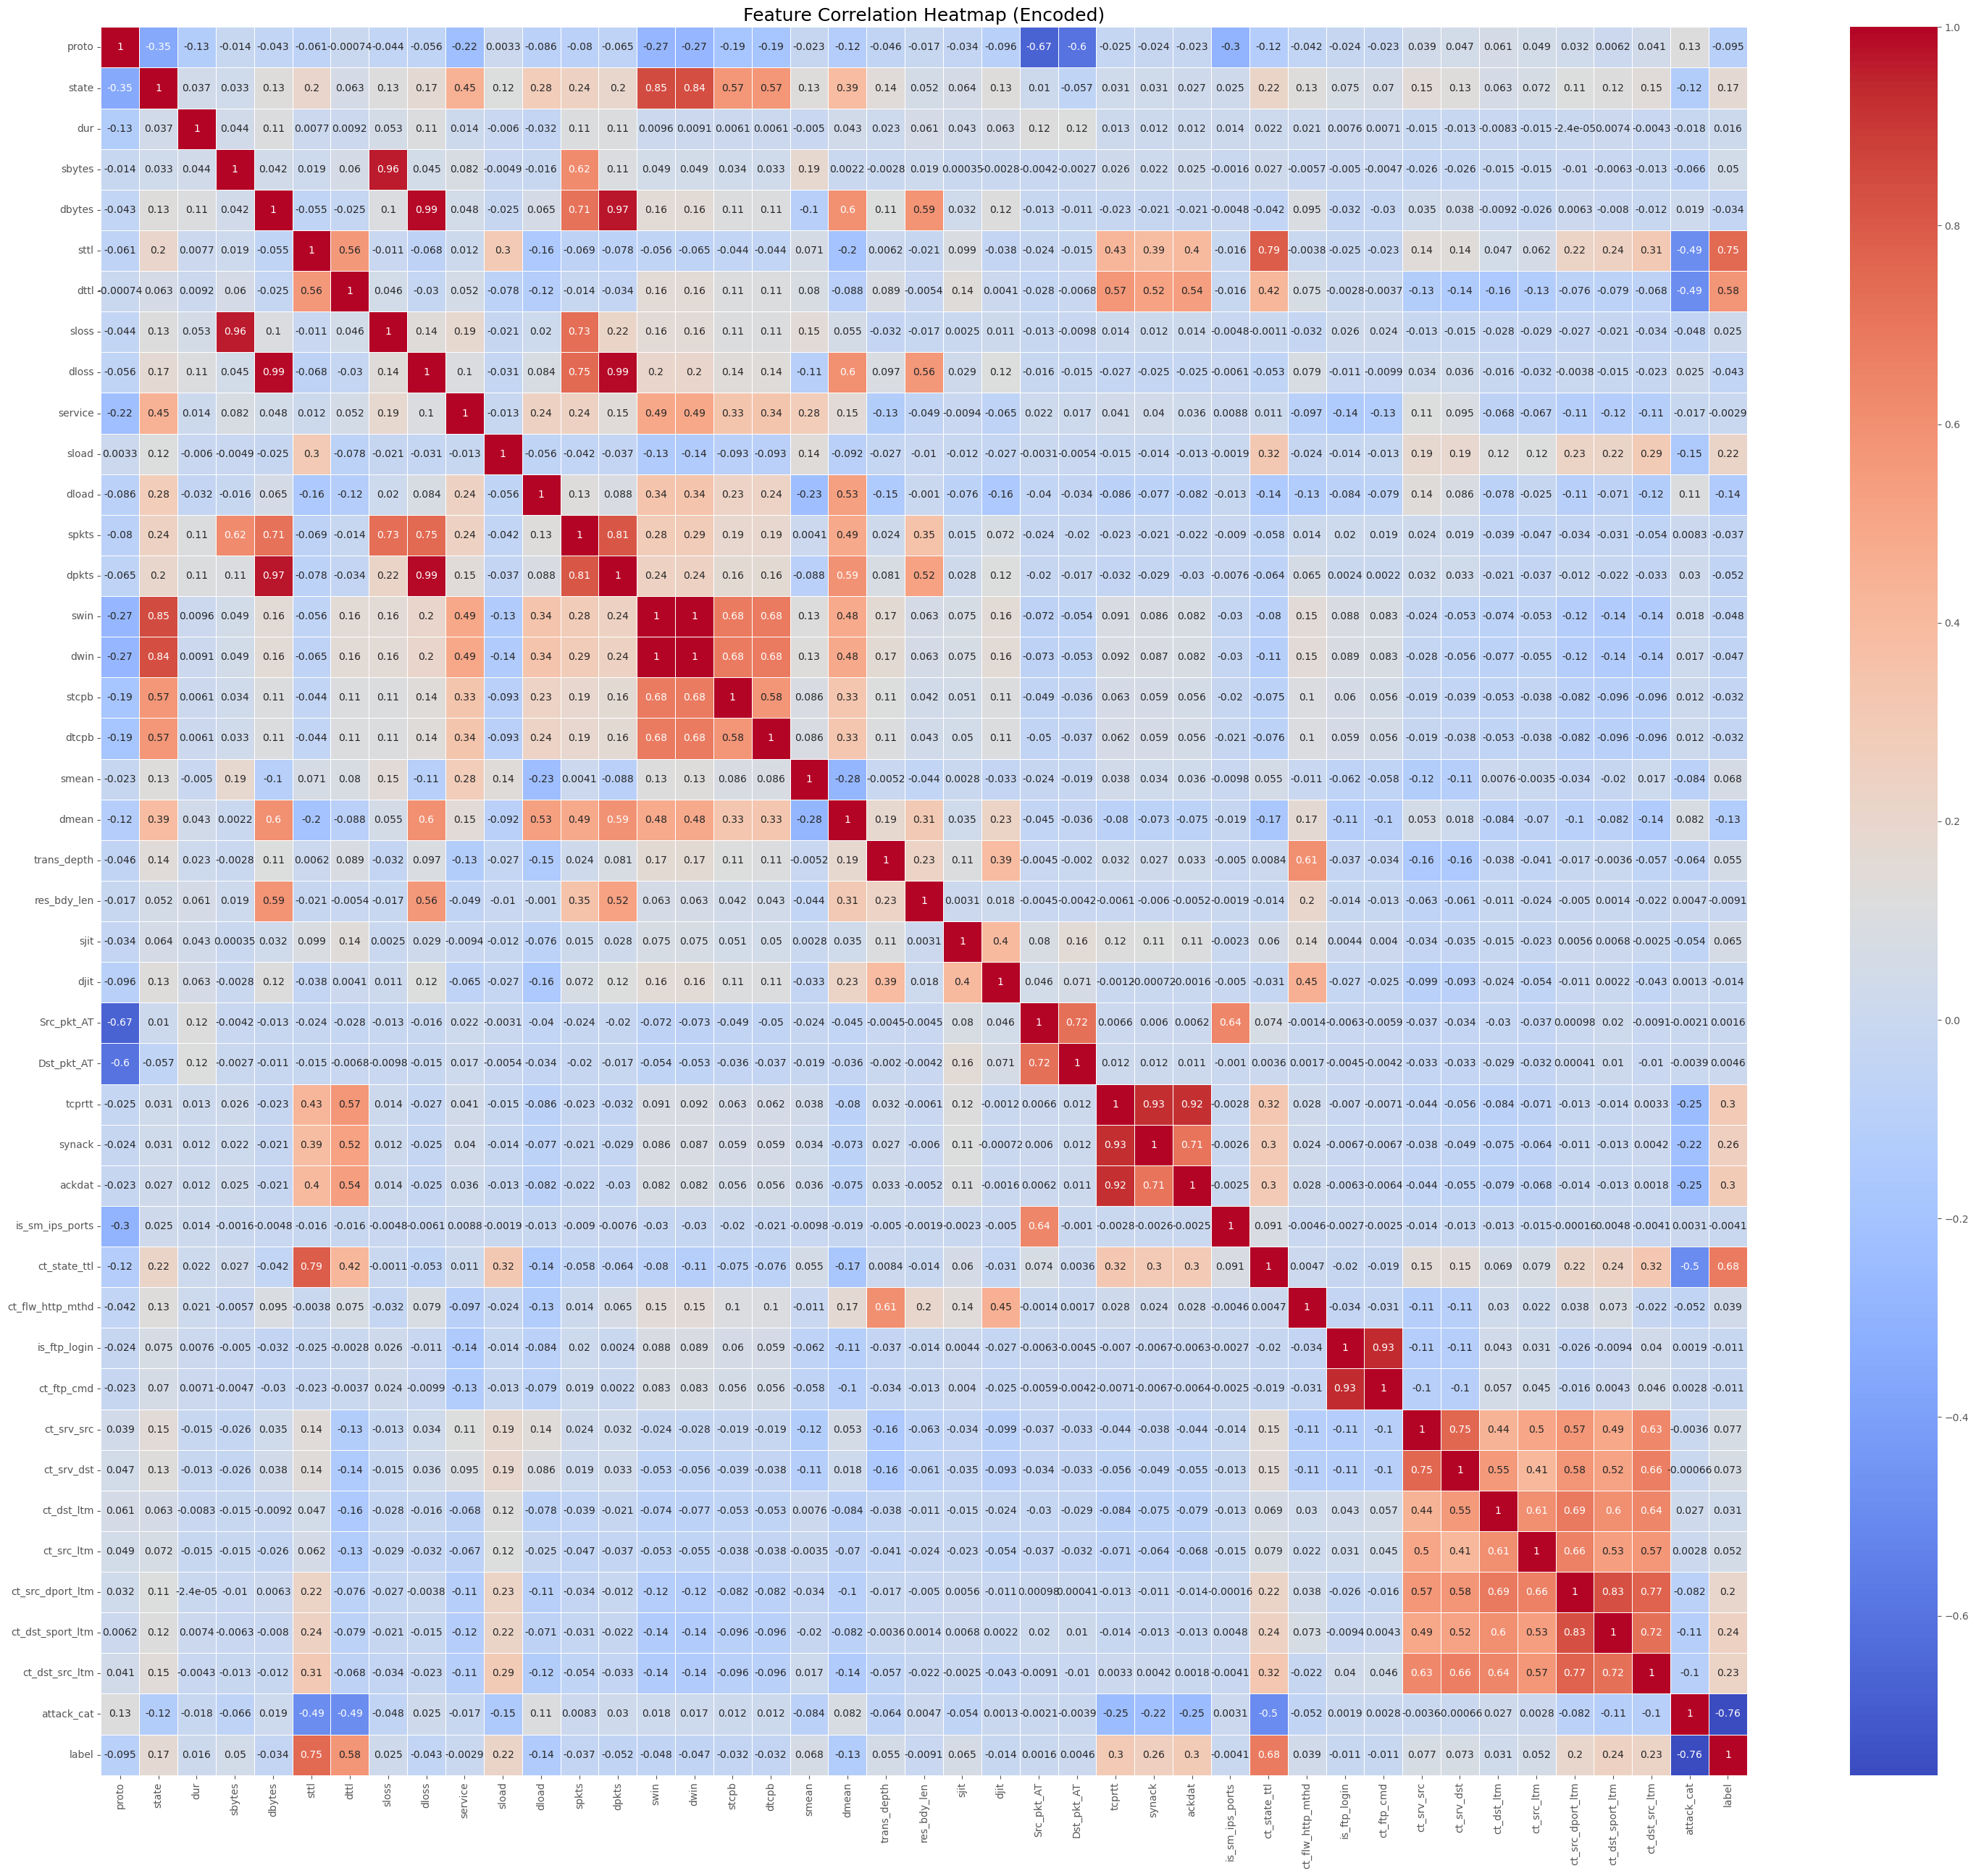

In [46]:
# ##########################################################
# 🔥 Feature Correlation Heatmap (Encoded Data)
# ##########################################################

# SELECT your encoded DataFrame (after label encoding)
# Options: df_encoded from df_original, df_log_clipped, or df_no_outliers
corr_matrix = df_encoded.corr()  # 👈 This ensures you're using the encoded version

# Set up the figure size (tweak as needed)
plt.figure(figsize=(30, 26))

# Create the heatmap
sns.heatmap(corr_matrix, 
            annot=True,       # Shows correlation values inside the cells
            cmap='coolwarm',  # Color scheme
            linewidths=0.5)   # Line between cells

# Add title and format
plt.title('Feature Correlation Heatmap (Encoded)', fontsize=18)
plt.tight_layout()
plt.show()

In [47]:
df_encoded.shape

(2027332, 43)